In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os
import xgboost as xgb
from xgboost import plot_importance

In [51]:
crimesNY=pd.read_csv('NYPD.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16400\1840045486.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crimesNY=pd.read_csv('NYPD.csv')


In [53]:
crimesNY.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983207e+06,6.981041e+06,6.983207e+06,6.977342e+06,6.977342e+06,6.959143e+06,6.959143e+06,157084.000000,6.959143e+06,6.959143e+06
mean,5.500768e+08,6.327224e+01,2.957909e+02,4.148457e+02,7.304343e-01,1.004796e+06,2.070544e+05,13.598400,4.073495e+01,-7.392583e+01
std,2.597838e+08,3.451961e+01,1.499370e+02,2.180586e+02,6.752324e+00,2.174732e+04,3.153994e+04,12.471429,8.647664e-02,7.842862e-02
min,1.000001e+08,-9.900000e+01,1.010000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.252107e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.916830e+05,1.843520e+05,3.000000,4.067261e+01,-7.397323e+01
50%,5.500624e+08,6.300000e+01,3.410000e+02,3.860000e+02,0.000000e+00,1.004370e+06,2.059660e+05,11.000000,4.073196e+01,-7.392733e+01
75%,7.750561e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016586e+06,2.351580e+05,30.000000,4.081212e+01,-7.388325e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


In [54]:
crimesNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983207 entries, 0 to 6983206
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [55]:
for column in crimesNY.columns:
    print(column,'have ',(crimesNY[column].isna().sum()*100/len(crimesNY)),' % missing values')

CMPLNT_NUM have  0.0  % missing values
CMPLNT_FR_DT have  0.009379644624597266  % missing values
CMPLNT_FR_TM have  0.0006873632701994943  % missing values
CMPLNT_TO_DT have  23.89125798504899  % missing values
CMPLNT_TO_TM have  23.826144635265717  % missing values
ADDR_PCT_CD have  0.03101726756775218  % missing values
RPT_DT have  0.0  % missing values
KY_CD have  0.0  % missing values
OFNS_DESC have  0.26957528253136415  % missing values
PD_CD have  0.08398719957750071  % missing values
PD_DESC have  0.08398719957750071  % missing values
CRM_ATPT_CPTD_CD have  0.00010024047690409292  % missing values
LAW_CAT_CD have  0.0  % missing values
BORO_NM have  0.1560028221990269  % missing values
LOC_OF_OCCUR_DESC have  21.19358627060604  % missing values
PREM_TYP_DESC have  0.5689649469076314  % missing values
JURIS_DESC have  0.0  % missing values
JURISDICTION_CODE have  0.08398719957750071  % missing values
PARKS_NM have  99.6413109335009  % missing values
HADEVELOPT have  95.0448554654

In [56]:
crimesNY.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [57]:
crimesNY.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT'],inplace=True)
crimesNY.drop(columns='PATROL_BORO',inplace = True)
crimesNY.drop(columns=['KY_CD','RPT_DT','PD_DESC','PD_CD'],inplace=True)

In [59]:
crimesNY.loc[crimesNY['PARKS_NM'].notnull(),'PARKS_NM'] = 1
crimesNY.loc[crimesNY['PARKS_NM'].isna(),'PARKS_NM'] = 0

crimesNY.loc[crimesNY['HADEVELOPT'].notnull(),'HADEVELOPT'] = 1
crimesNY.loc[crimesNY['HADEVELOPT'].isna(),'HADEVELOPT'] = 0

crimesNY.loc[crimesNY['STATION_NAME'].notnull(),'STATION_NAME'] = 1
crimesNY.loc[crimesNY['STATION_NAME'].isna(),'STATION_NAME'] = 0

crimesNY = crimesNY.rename({'PARKS_NM':'IN_PARK','HADEVELOPT':'IN_PUBLIC_HOUSING','STATION_NAME':'IN_STATION'}, axis=1)

In [60]:
crimesNY.drop(columns=['X_COORD_CD','Y_COORD_CD',"Lat_Lon"],inplace=True)

In [61]:
#we need also to drop rows that don't have coordinates
crimesNY = crimesNY[crimesNY['Latitude'].notna()]
crimesNY = crimesNY[crimesNY['Longitude'].notna()]

In [62]:
if all(crimesNY['CMPLNT_FR_DT'].notna() == crimesNY['CMPLNT_TO_DT'].notna()):
    crimesNY.drop(columns='CMPLNT_TO_DT',inplace = True)

In [63]:
crimesNY.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,...,IN_PUBLIC_HOUSING,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,...,0,25-44,BLACK,M,40.845868,-73.915888,0,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STATEN ISLAND,...,0,NaN,NaN,NaN,40.627061,-74.077149,0,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,MANHATTAN,...,0,NaN,NaN,NaN,40.800966,-73.969047,0,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,...,0,NaN,UNKNOWN,M,40.745242,-73.894253,0,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,...,0,NaN,NaN,NaN,40.810352,-73.924942,0,UNKNOWN,UNKNOWN,E


In [64]:
crimesNY['CMPLNT_FR_DT'] = pd.to_datetime(crimesNY['CMPLNT_FR_DT'], errors='coerce')
crimesNY['CMPLNT_FR_TM'] = pd.to_datetime(crimesNY['CMPLNT_FR_TM'], errors='coerce')
crimesNY['CMPLNT_TO_DT'] = pd.to_datetime(crimesNY['CMPLNT_TO_DT'], errors='coerce')
crimesNY['CMPLNT_TO_TM'] = pd.to_datetime(crimesNY['CMPLNT_TO_TM'], errors='coerce')


crimesNY = crimesNY[crimesNY['CMPLNT_FR_DT'].notna()]
crimesNY = crimesNY[crimesNY['CMPLNT_FR_TM'].notna()]


crimesNY['year'] = crimesNY['CMPLNT_FR_DT'].dt.year
crimesNY['month'] = crimesNY['CMPLNT_FR_DT'].dt.month
crimesNY['day'] = crimesNY['CMPLNT_FR_DT'].dt.day
crimesNY['hour'] = crimesNY['CMPLNT_FR_TM'].dt.hour


crimesNY['weekday'] = pd.to_datetime(crimesNY['CMPLNT_FR_DT']).dt.day_name()

crimesNY.drop(columns='CMPLNT_FR_DT', inplace=True)
crimesNY.drop(columns='CMPLNT_FR_TM', inplace=True)
crimesNY.drop(columns='CMPLNT_TO_TM', inplace=True)
crimesNY.drop(columns='CMPLNT_TO_DT', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16400\1026981221.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimesNY['CMPLNT_FR_TM'] = pd.to_datetime(crimesNY['CMPLNT_FR_TM'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_16400\1026981221.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimesNY['CMPLNT_TO_TM'] = pd.to_datetime(crimesNY['CMPLNT_TO_TM'], errors='coerce')


In [65]:
crimesNY.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,700381962,46.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.915888,0,25-44,WHITE HISPANIC,F,2015,5,28,15,Thursday
1,642234217,120.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-74.077149,0,45-64,WHITE,M,2013,10,28,13,Monday
2,242465164,24.0,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.969047,0,NaN,UNKNOWN,E,2012,5,9,20,Wednesday
3,927207428,108.0,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.894253,0,45-64,ASIAN / PACIFIC ISLANDER,M,2014,1,3,13,Friday
4,492142357,40.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,0.0,...,-73.924942,0,UNKNOWN,UNKNOWN,E,2016,4,13,0,Wednesday


In [66]:
for i in crimesNY.columns:
  print(i,crimesNY[i].isnull().sum())

CMPLNT_NUM 0
ADDR_PCT_CD 1329
OFNS_DESC 18706
CRM_ATPT_CPTD_CD 7
LAW_CAT_CD 0
BORO_NM 10418
LOC_OF_OCCUR_DESC 1475400
PREM_TYP_DESC 38671
JURIS_DESC 0
JURISDICTION_CODE 5392
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 4690219
SUSP_RACE 3325873
SUSP_SEX 3458312
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 1633383
VIC_RACE 308
VIC_SEX 307
year 0
month 0
day 0
hour 0
weekday 0


In [67]:
crimesNY['SUSP_RACE'] = crimesNY['SUSP_RACE'].fillna('UNKNOWN')
crimesNY['VIC_RACE'] = crimesNY['VIC_RACE'].fillna('UNKNOWN')

crimesNY['SUSP_SEX'] = crimesNY['SUSP_SEX'].fillna('U')
crimesNY['VIC_SEX'] = crimesNY['VIC_SEX'].fillna('U')

In [68]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
crimesNY.loc[~crimesNY['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = 'UNKNOWN'
crimesNY.loc[~crimesNY['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [69]:
crimesNY['BORO_NM'] = crimesNY['BORO_NM'].fillna('UNKNOWN')

In [70]:
crimesNY.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,700381962,46.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.915888,0,25-44,WHITE HISPANIC,F,2015,5,28,15,Thursday
1,642234217,120.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-74.077149,0,45-64,WHITE,M,2013,10,28,13,Monday
2,242465164,24.0,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.969047,0,UNKNOWN,UNKNOWN,E,2012,5,9,20,Wednesday
3,927207428,108.0,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.894253,0,45-64,ASIAN / PACIFIC ISLANDER,M,2014,1,3,13,Friday
4,492142357,40.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,0.0,...,-73.924942,0,UNKNOWN,UNKNOWN,E,2016,4,13,0,Wednesday


In [71]:
crimesNY.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

In [72]:
for i in crimesNY.columns:
  print(i,crimesNY[i].isnull().sum())
print(len(crimesNY))

CMPLNT_NUM 0
ADDR_PCT_CD 1329
OFNS_DESC 18706
CRM_ATPT_CPTD_CD 7
LAW_CAT_CD 0
BORO_NM 0
LOC_OF_OCCUR_DESC 0
PREM_TYP_DESC 38671
JURIS_DESC 0
JURISDICTION_CODE 5392
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
year 0
month 0
day 0
hour 0
weekday 0
6958307


In [73]:
crimesNY.dropna(inplace=True)
len(crimesNY)

6901168

In [74]:
crimesNY.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,700381962,46.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.915888,0,25-44,WHITE HISPANIC,F,2015,5,28,15,Thursday
1,642234217,120.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-74.077149,0,45-64,WHITE,M,2013,10,28,13,Monday
2,242465164,24.0,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,STREET,N.Y. POLICE DEPT,0.0,...,-73.969047,0,UNKNOWN,UNKNOWN,E,2012,5,9,20,Wednesday
3,927207428,108.0,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.894253,0,45-64,ASIAN / PACIFIC ISLANDER,M,2014,1,3,13,Friday
4,492142357,40.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,UNKNOWN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,0.0,...,-73.924942,0,UNKNOWN,UNKNOWN,E,2016,4,13,0,Wednesday


In [75]:
crimesNY.LOC_OF_OCCUR_DESC.value_counts()

LOC_OF_OCCUR_DESC
INSIDE         3501406
FRONT OF       1603956
UNKNOWN        1463599
OPPOSITE OF     184497
REAR OF         147710
Name: count, dtype: int64

In [76]:
crimesNY = crimesNY.rename({'LAW_CAT_CD':'CRIME_CLASS'},axis = 1)
crimesNY = crimesNY.rename({'LOC_OF_OCCUR_DESC':'OCCURENCE'},axis = 1)
crimesNY = crimesNY.rename({'CRM_ATPT_CPTD_CD':'COMPLETED'},axis = 1)

In [77]:
crimesNY.OFNS_DESC.value_counts()

OFNS_DESC
PETIT LARCENY                      1155089
HARRASSMENT 2                       874547
ASSAULT 3 & RELATED OFFENSES        727054
CRIMINAL MISCHIEF & RELATED OF      695057
GRAND LARCENY                       600138
                                    ...   
FELONY SEX CRIMES                       10
ABORTION                                 7
OFFENSES AGAINST MARRIAGE UNCL           4
KIDNAPPING AND RELATED OFFENSES          3
UNDER THE INFLUENCE OF DRUGS             3
Name: count, Length: 70, dtype: int64

In [78]:
# categorize property related offenses
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD', 
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

# categorize sexual offenses
sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

# categorize drugs/alcohol related offenses
drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']



# categorize personal (assault/homicidal/kidnapping/weapon) offenses
personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'UNLAWFUL POSS. WEAP. ON SCHOOL']

# categorize administrative/trespassing/loitering/traffic offenses
admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS', 
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

# categorize remaining offenses as other
other = ['MISCELLANEOUS PENAL LAW', 'OFFENSES AGAINST MARRIAGE UNCL',
         'OTHER STATE LAWS (NON PENAL LAW)', 'FORTUNE TELLING',
         'NYS LAWS-UNCLASSIFIED VIOLATION', 'LOITERING/GAMBLING (CARDS, DIC',
         'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
         'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
         'NYS LAWS-UNCLASSIFIED FELONY', 'UNAUTHORIZED USE OF A VEHICLE', 'OTHER']

In [79]:
conditions = [
    crimesNY['OFNS_DESC'].isin(prop),
    crimesNY['OFNS_DESC'].isin(sexual),
    crimesNY['OFNS_DESC'].isin(drug_alch),
    crimesNY['OFNS_DESC'].isin(personal),
    crimesNY['OFNS_DESC'].isin(admin)
]

categories = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']

# Use np.select to create the 'OFNS_CATS' column
crimesNY['OFNS_DESC'] = np.select(conditions, categories, default='OTHER')

In [80]:
crimesNY['OFNS_DESC'].unique()

array(['SEXUAL', 'PROPERTY', 'PERSONAL', 'DRUGS/ALCOHOL',
       'ADMINISTRATIVE', 'OTHER'], dtype=object)

In [81]:
column_titles = ['CMPLNT_NUM','year','month', 'day','weekday','hour','Latitude', 'Longitude', 'COMPLETED',
                 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC','OCCURENCE','JURIS_DESC', 'JURISDICTION_CODE',
                 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
                 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
crimesNY = crimesNY.reindex(columns = column_titles)

In [82]:
crimesNY.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,2015,5,28,Thursday,15,40.845868,-73.915888,COMPLETED,SEXUAL,...,0.0,0,0,0,25-44,BLACK,M,25-44,WHITE HISPANIC,F
1,642234217,2013,10,28,Monday,13,40.627061,-74.077149,COMPLETED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,45-64,WHITE,M
2,242465164,2012,5,9,Wednesday,20,40.800966,-73.969047,COMPLETED,PERSONAL,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E
3,927207428,2014,1,3,Friday,13,40.745242,-73.894253,ATTEMPTED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,M,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,2016,4,13,Wednesday,0,40.810352,-73.924942,COMPLETED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E


# Exploratory Data Analysis

In [84]:
import seaborn as sns

C:\Users\Dell\AppData\Local\Temp\ipykernel_16400\821175241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="VIC_RACE", data=crimesNY,kind="count", palette="cubehelix", height=10, aspect=2);


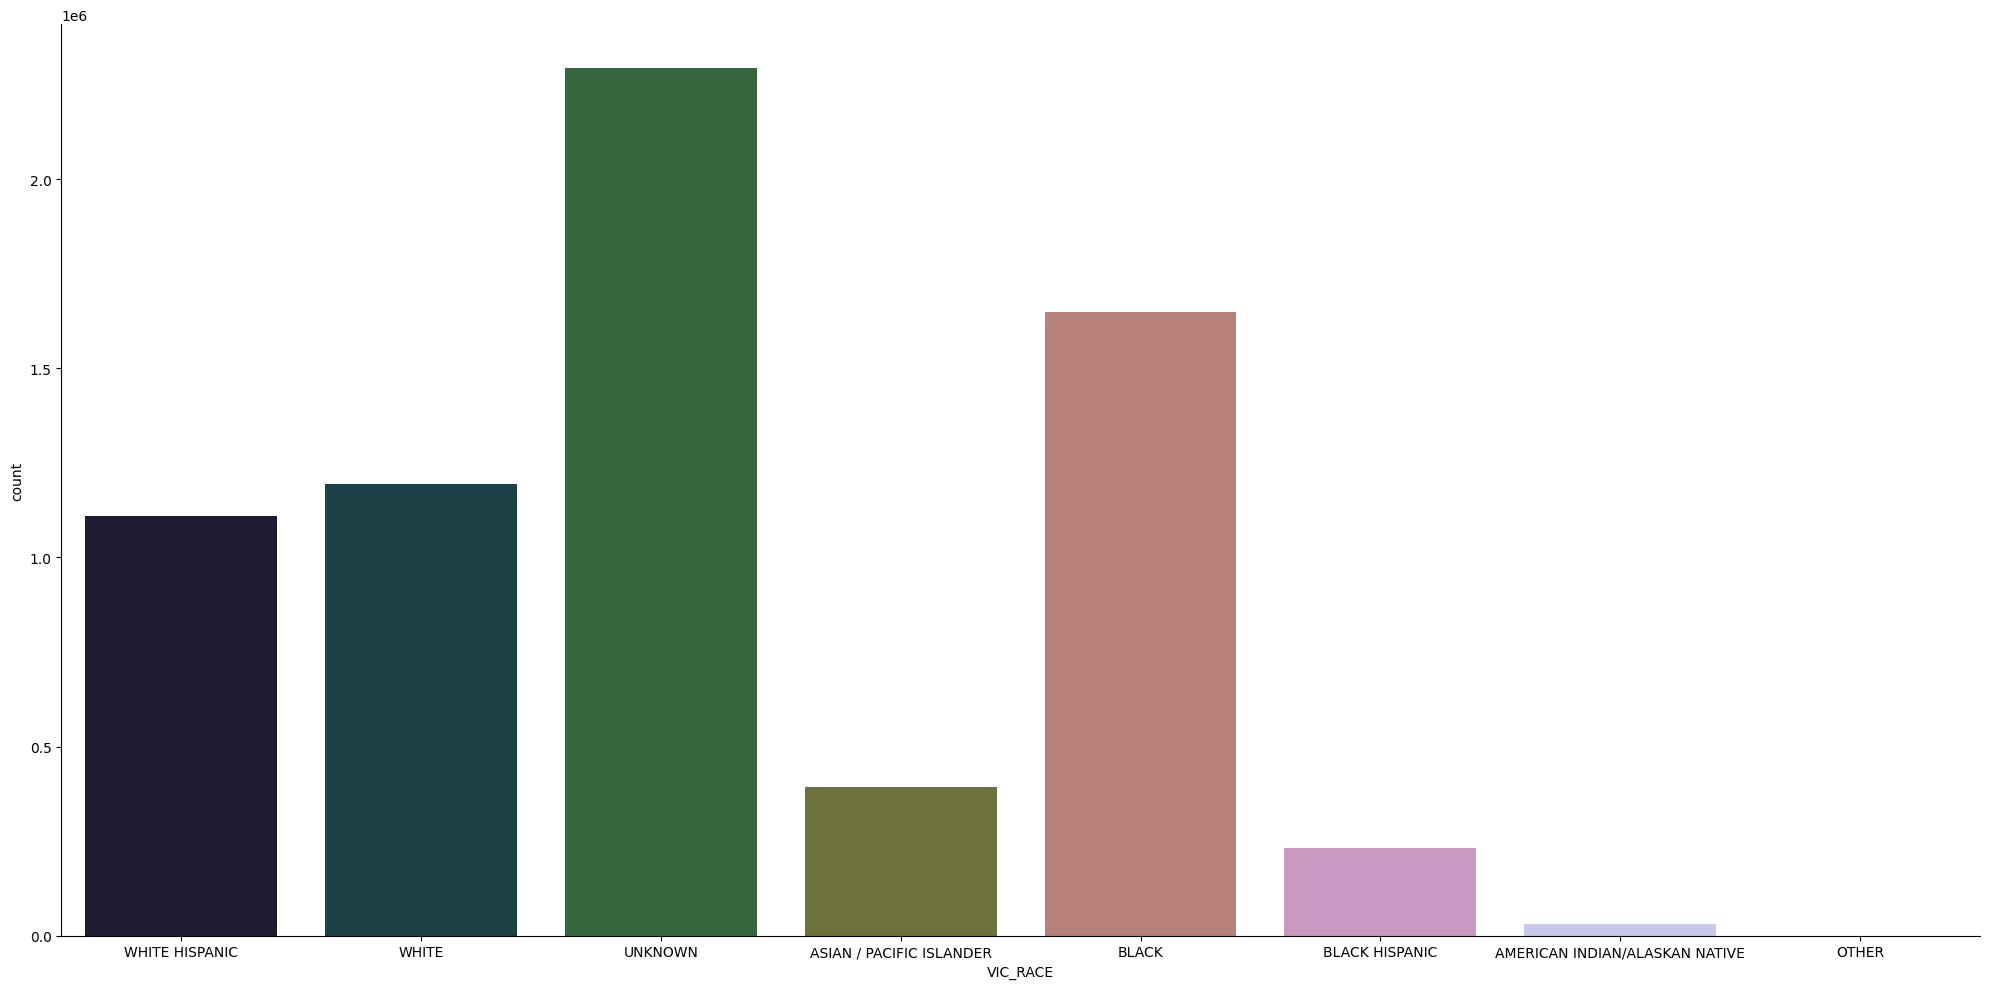

In [86]:
#Number of victims by race

sns.catplot(x="VIC_RACE", data=crimesNY,kind="count", palette="cubehelix", height=10, aspect=2);

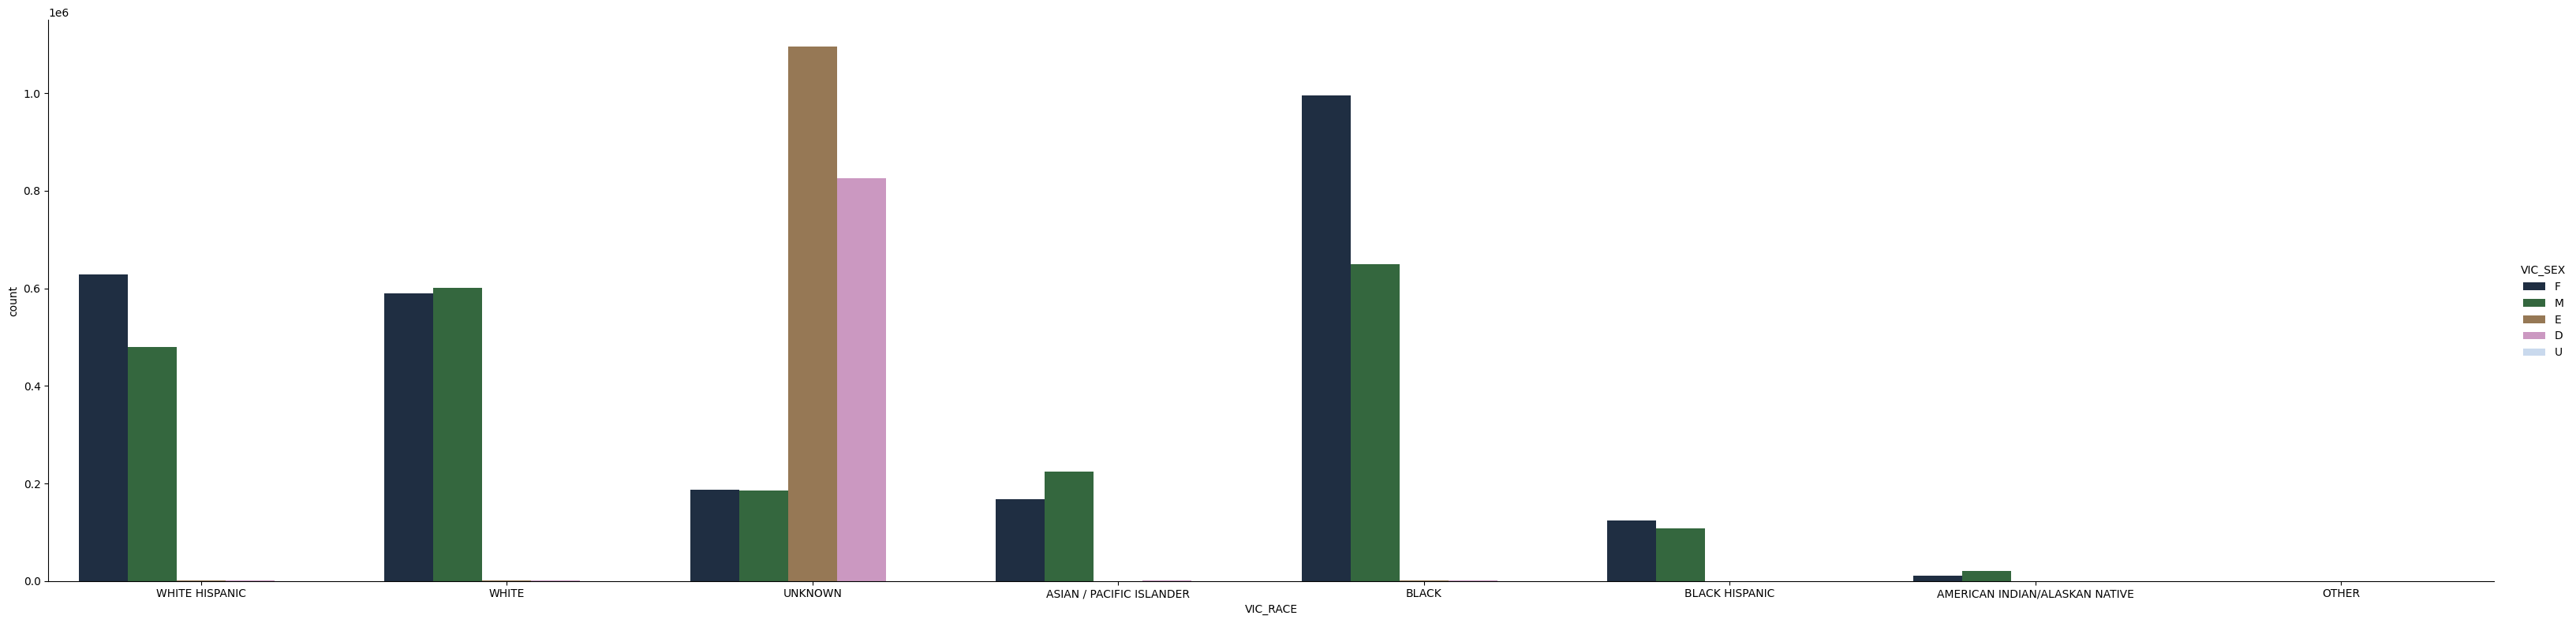

In [87]:
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=crimesNY, height=8, aspect=4)

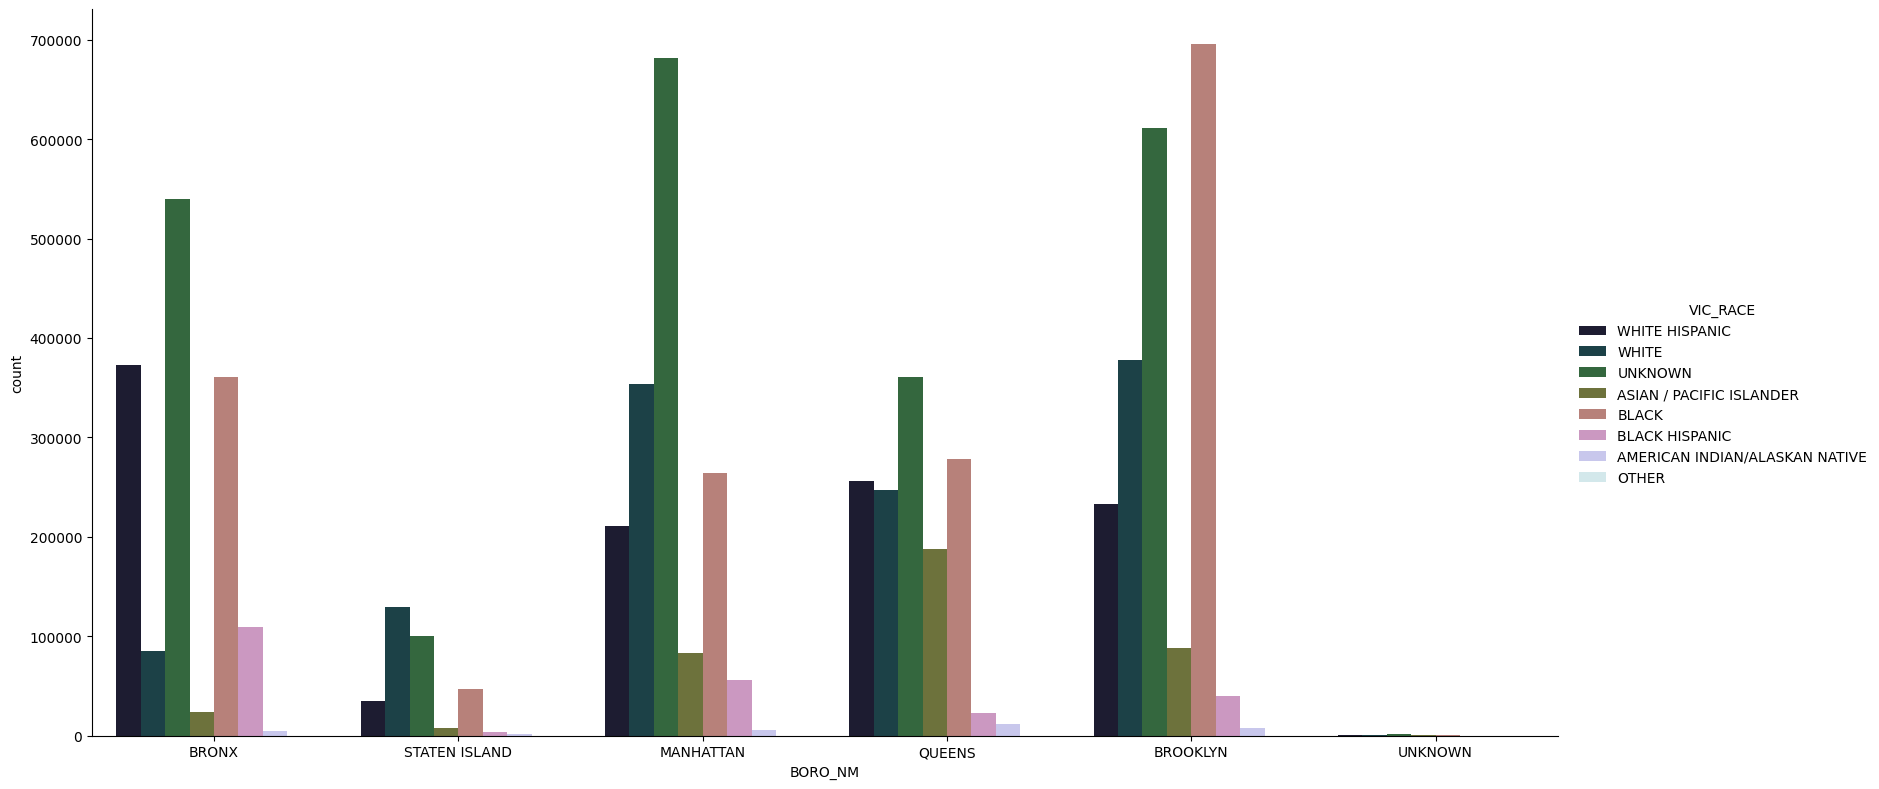

In [88]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=crimesNY, height=8, aspect = 2)

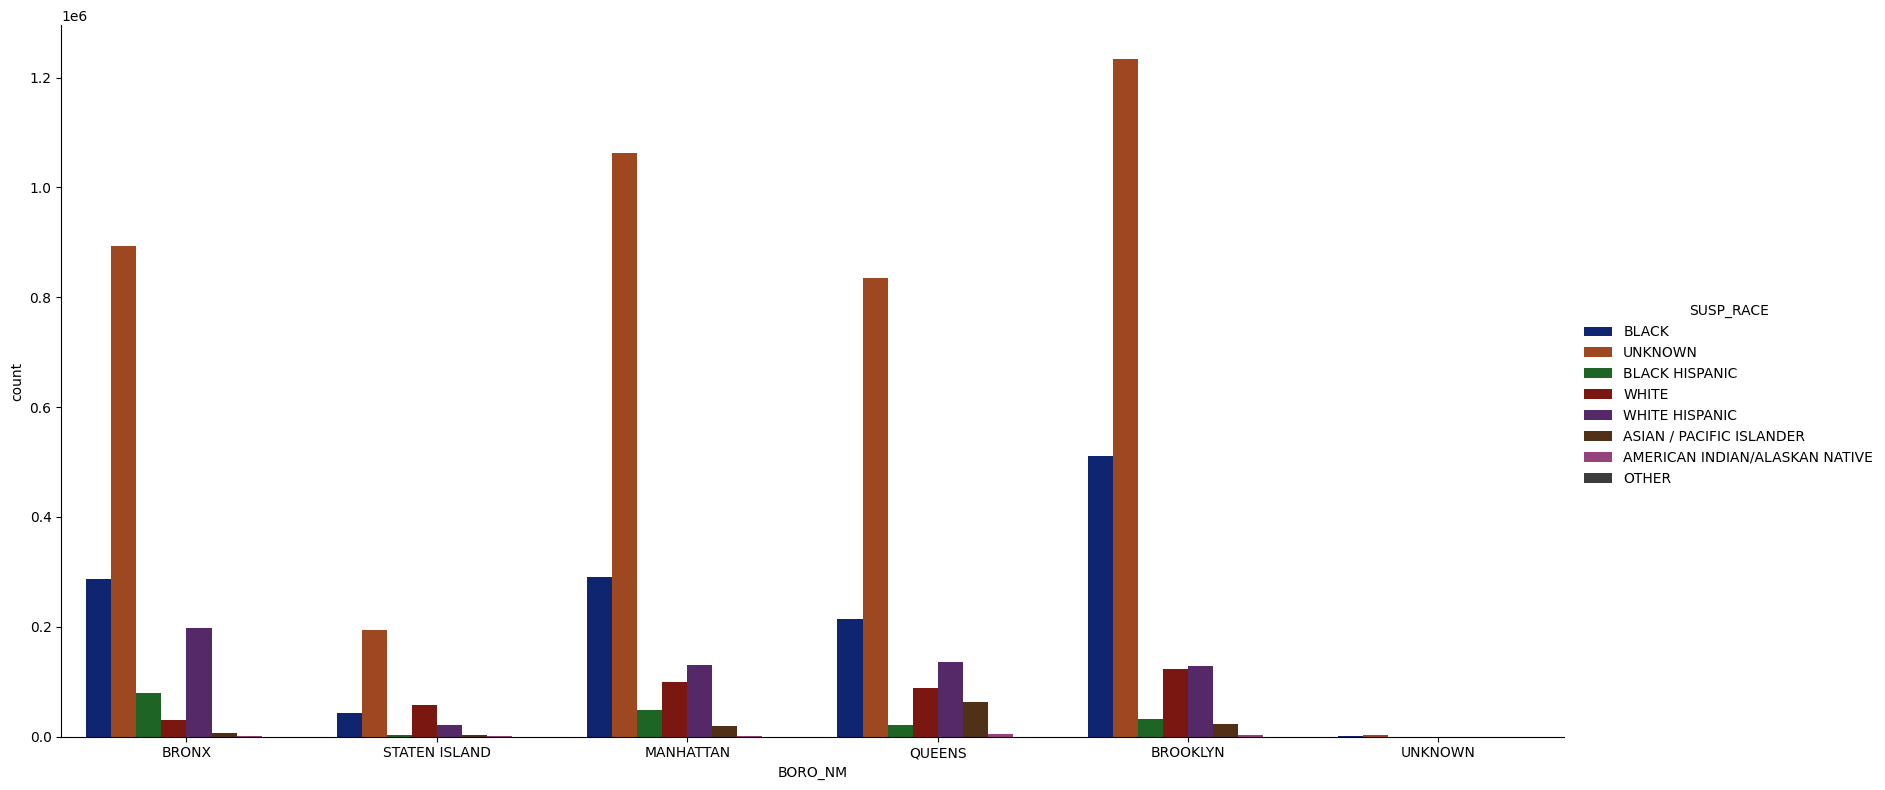

In [89]:
#Number of Suspects by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",palette="dark", data=crimesNY, height=8, aspect = 2)

<Figure size 1600x800 with 0 Axes>

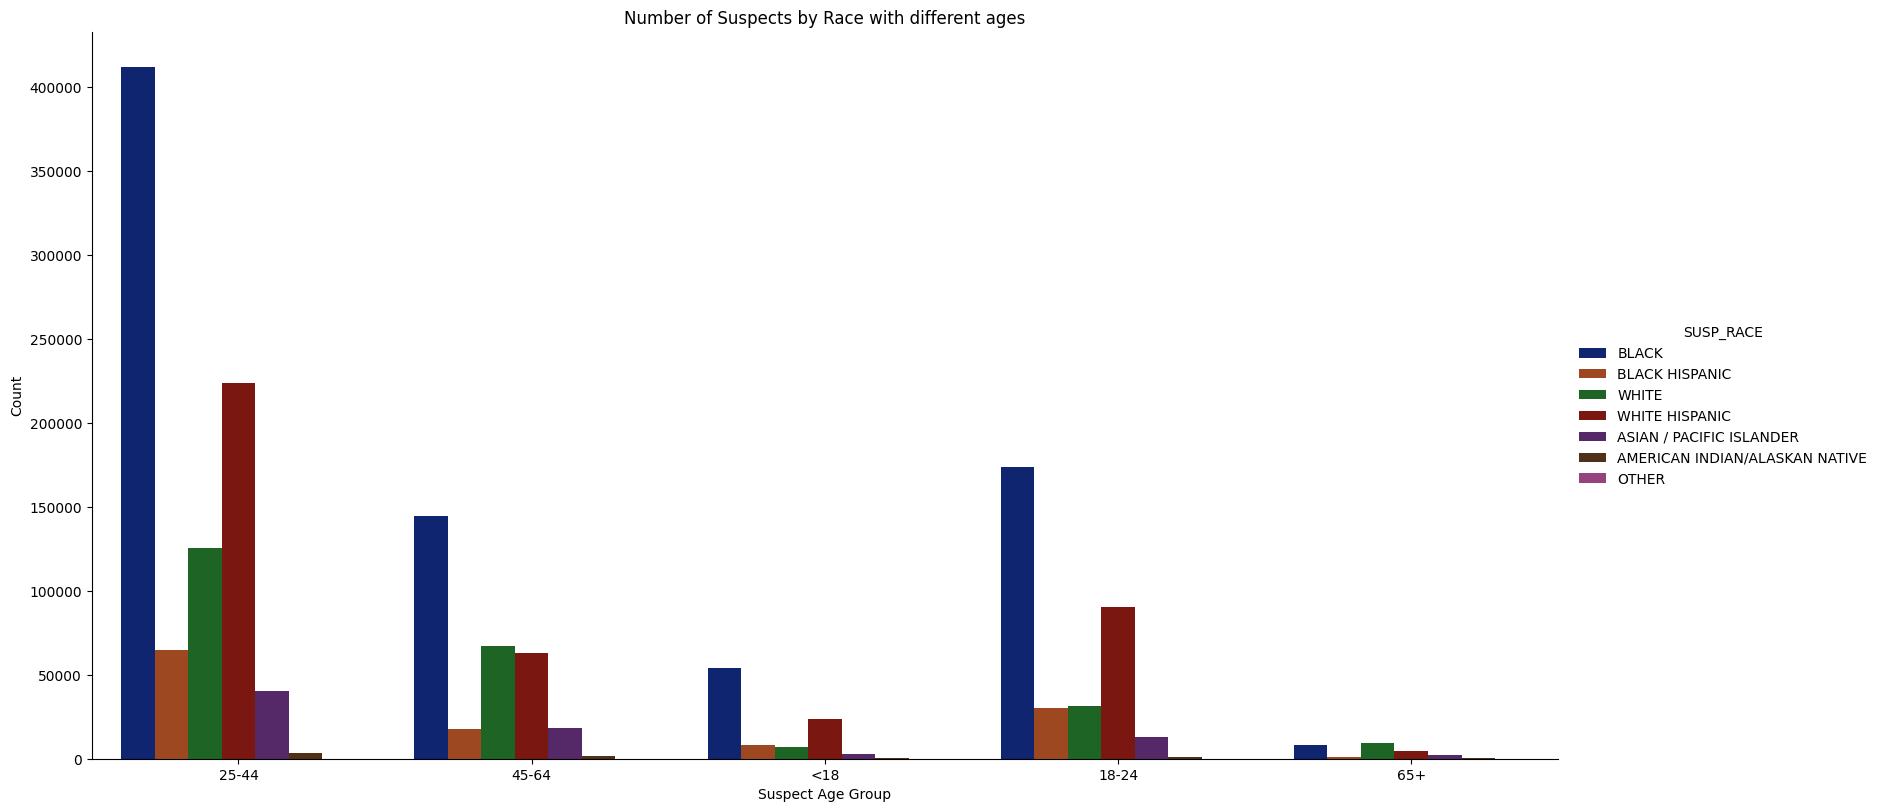

In [91]:
# Filter out rows with SUSP_AGE_GROUP == 'UNKNOWN' or SUSP_RACE == 'UNKNOWN'
filtered_data = crimesNY[(crimesNY['SUSP_AGE_GROUP'] != 'UNKNOWN') & (crimesNY['SUSP_RACE'] != 'UNKNOWN')]

# Number of suspects by Race in the different boroughs
plt.figure(figsize=(16, 8))
ax = sns.catplot(x="SUSP_AGE_GROUP", hue="SUSP_RACE", kind="count", palette="dark", data=filtered_data, height=8, aspect=2)

# Set plot labels and title
ax.set_axis_labels("Suspect Age Group", "Count")
ax.set(title="Number of Suspects by Race with different ages")

# Show the plot
plt.show()

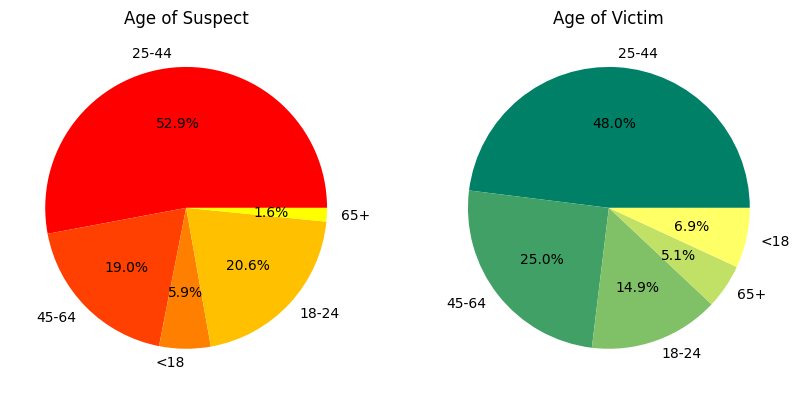

In [92]:
filtered_data_susp = crimesNY[crimesNY['SUSP_AGE_GROUP'] != 'UNKNOWN']
filtered_data_vic =  crimesNY[crimesNY['VIC_AGE_GROUP'] != 'UNKNOWN']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Age of suspect
filtered_data_susp['SUSP_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Suspect',
                                                                   colormap='autumn', autopct='%1.1f%%', ylabel='', ax=axs[0])

# Plot for Age of victim
filtered_data_vic['VIC_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Victim',
                                                                 colormap='summer', autopct='%1.1f%%', ylabel='', ax=axs[1])

plt.show()

Text(0.5, 1.0, 'crime success rate')

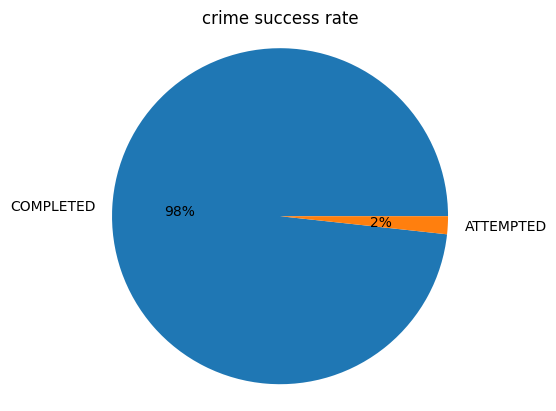

In [95]:
# Successful crime rate
plt.pie(crimesNY['COMPLETED'].value_counts(normalize=True).round(4),labels=crimesNY['COMPLETED'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

array([<Axes: ylabel='count'>], dtype=object)

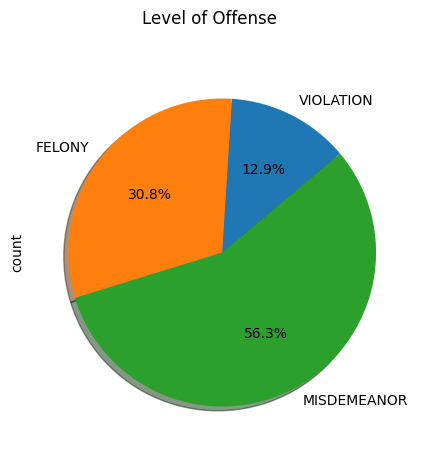

In [96]:
crimesNY['CRIME_CLASS'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16400\3190605566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")


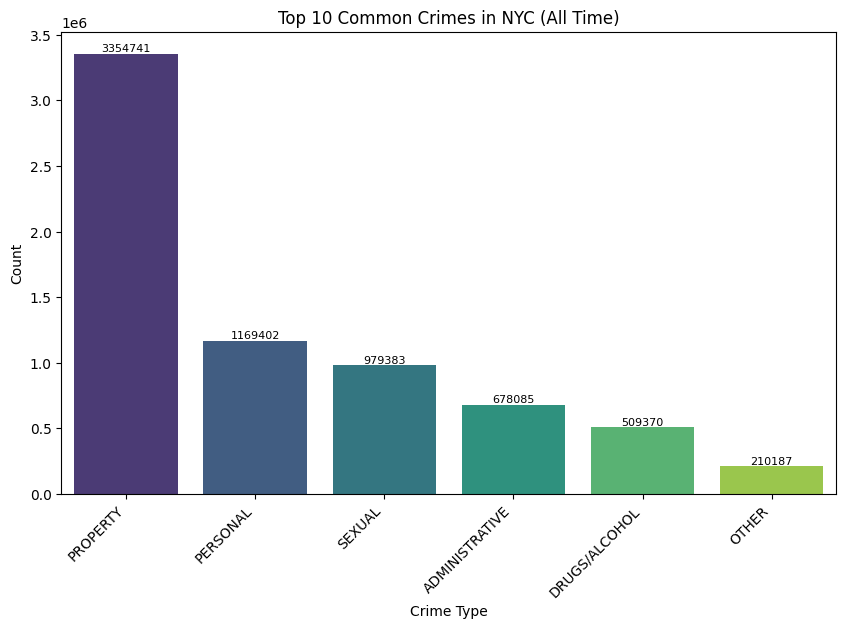

In [97]:
# Get the top 10 common crimes
top_crimes = crimesNY['OFNS_DESC'].value_counts()[:10]

# Plotting with Seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Common Crimes in NYC (All Time)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding count values on top of each bar
for i, value in enumerate(top_crimes.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

# Location of the occured crimes

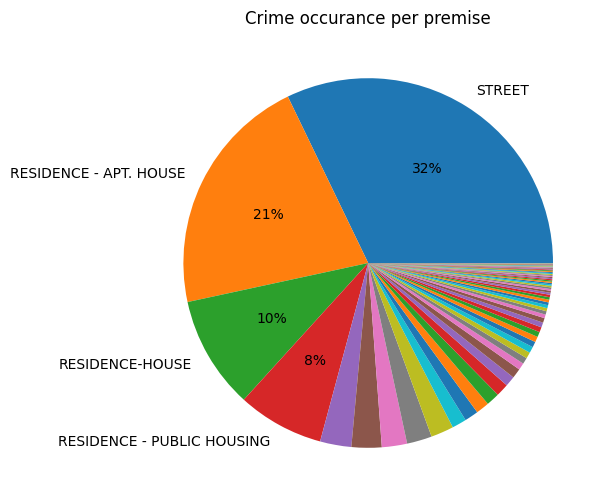

In [98]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=crimesNY['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

# Time of incidents 

# Crime distribution per month

Text(0.5, 1.0, 'Crimes per month')

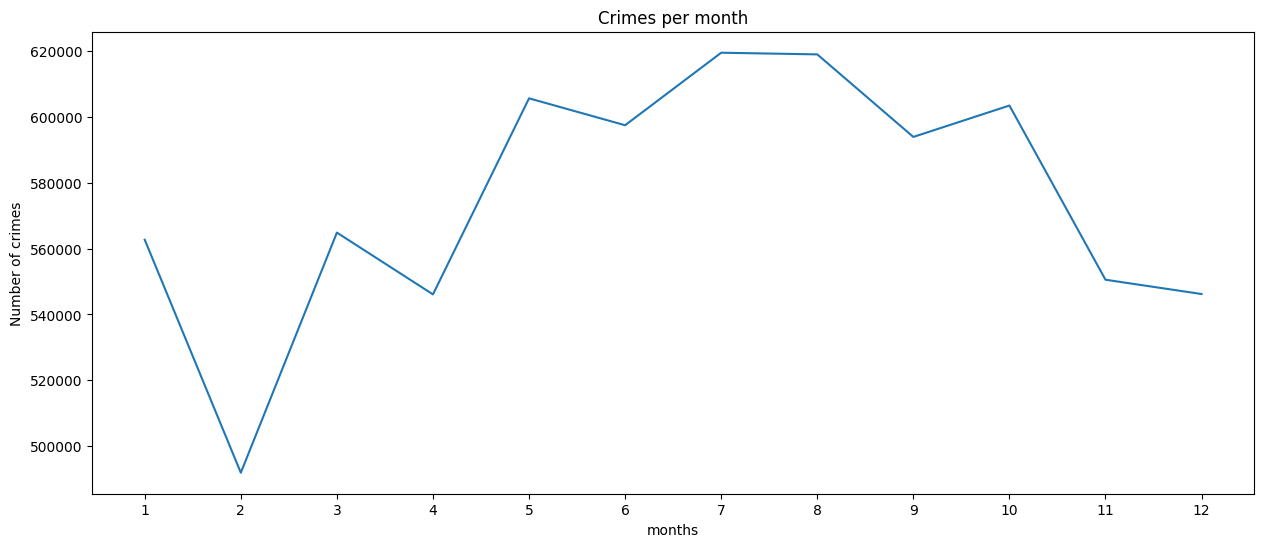

In [99]:

fig= plt.figure(figsize=(15,6))
crimesNY.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

# Crime distribution per week days

Text(0.5, 1.0, 'Crimes per week days')

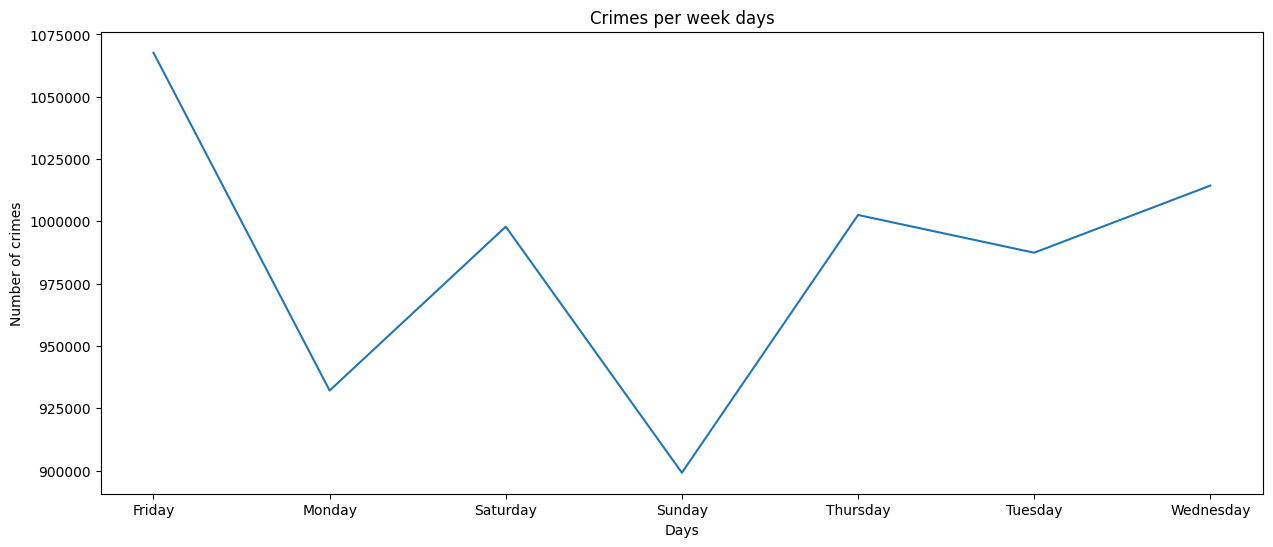

In [100]:

fig= plt.figure(figsize=(15,6))
crimesNY.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

# Crime distribution per hour

Text(0.5, 1.0, 'Crimes per hour')

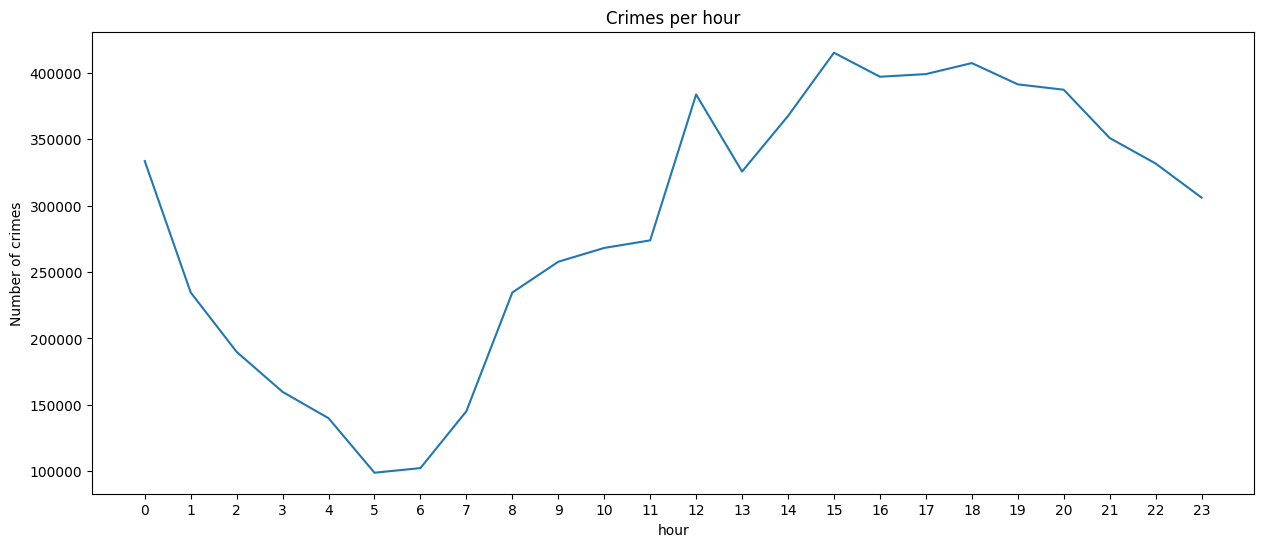

In [101]:
fig= plt.figure(figsize=(15,6))
crimesNY.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

# Crime distribution per year

Text(0.5, 1.0, 'Crime evolution')

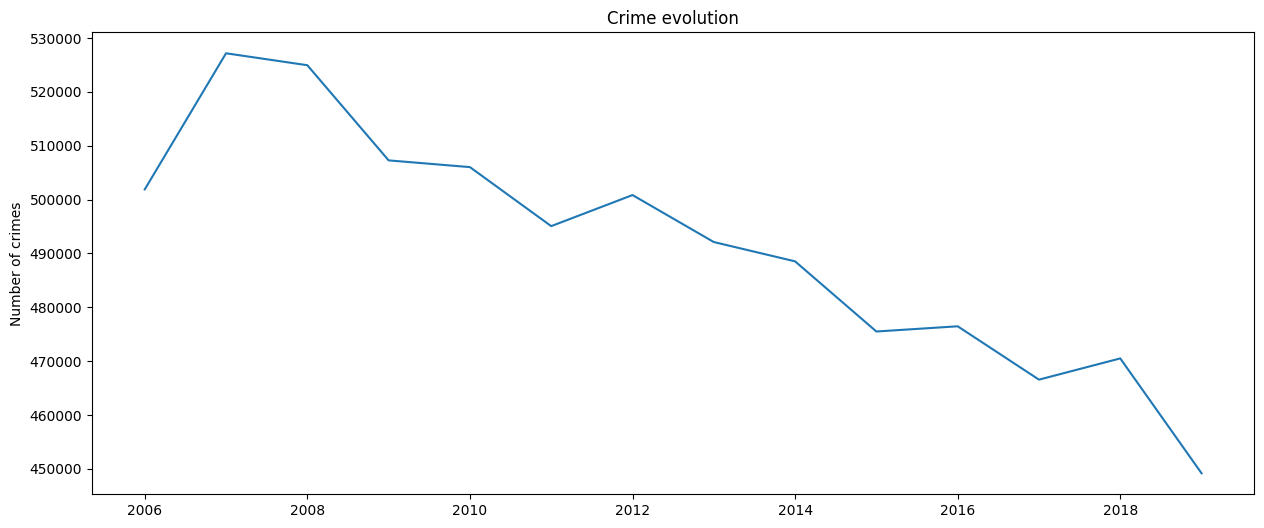

In [102]:
fig= plt.figure(figsize=(15,6))
temp_df = crimesNY[crimesNY["year"]>2005]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution')

In [104]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
crimesNY = reduce_mem_usage(crimesNY)

Memory usage after optimization is: 1316.29 MB
Memory usage after optimization is: 1059.62 MB
Decreased by 19.5%


In [105]:
crimesNY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6901168 entries, 0 to 6983204
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int32  
 1   year               int16  
 2   month              int8   
 3   day                int8   
 4   weekday            object 
 5   hour               int8   
 6   Latitude           float16
 7   Longitude          float16
 8   COMPLETED          object 
 9   OFNS_DESC          object 
 10  ADDR_PCT_CD        float16
 11  CRIME_CLASS        object 
 12  BORO_NM            object 
 13  PREM_TYP_DESC      object 
 14  OCCURENCE          object 
 15  JURIS_DESC         object 
 16  JURISDICTION_CODE  float16
 17  IN_PARK            object 
 18  IN_PUBLIC_HOUSING  object 
 19  IN_STATION         object 
 20  SUSP_AGE_GROUP     object 
 21  SUSP_RACE          object 
 22  SUSP_SEX           object 
 23  VIC_AGE_GROUP      object 
 24  VIC_RACE           object 
 25  VIC_SEX            obje

In [106]:
crimesNY.to_csv('final_crimesNY.csv', index=False)